--- US Population Growth Analysis ---
Loading us_pop_data.csv from sample content...
Columns in us_pop_data.csv: ['year', 'us_pop']
Data loaded and new columns created successfully.
   year    us_pop  Years Since 1790  Population in Millions
0  1790   3929326                 0                3.929326
1  1800   5308483                10                5.308483
2  1810   7239881                20                7.239881
3  1820   9638453                30                9.638453
4  1830  12866020                40               12.866020


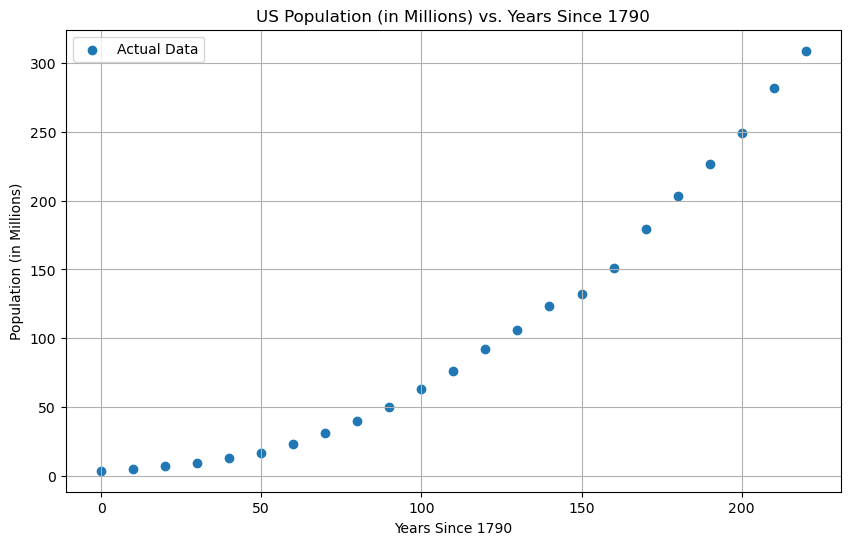


(c) Creating and evaluating linear regression model...
Linear Model R^2 value: 0.9195

(d) Creating 'Years Since 1790 Squared' column...
Column created.
   year    us_pop  Years Since 1790  Population in Millions  \
0  1790   3929326                 0                3.929326   
1  1800   5308483                10                5.308483   
2  1810   7239881                20                7.239881   
3  1820   9638453                30                9.638453   
4  1830  12866020                40               12.866020   

   Years Since 1790 Squared  
0                         0  
1                       100  
2                       400  
3                       900  
4                      1600  

(e) Creating and evaluating squared regression model...
Squared Model R^2 value: 0.9986

(f) Plotting models and comparing R^2 values...


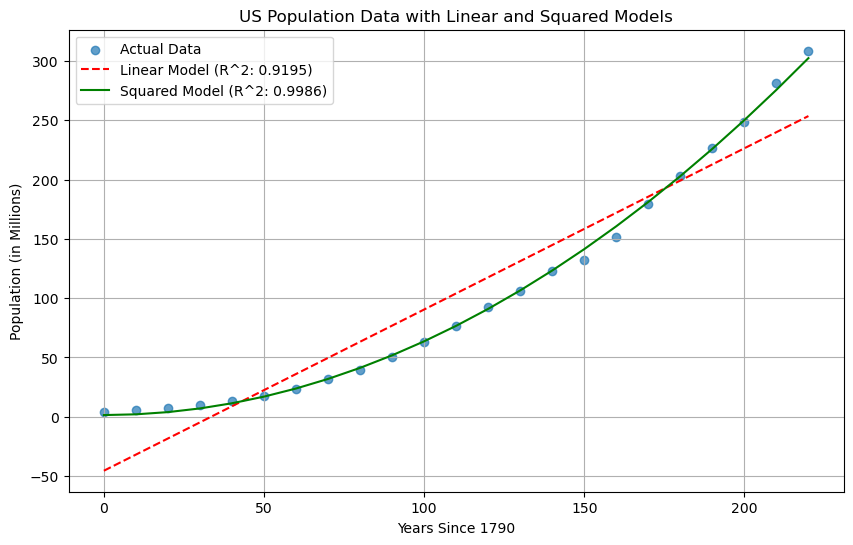


--- Model Comparison ---
Linear Model R^2: 0.9195
Squared Model R^2: 0.9986

The squared model fits the data better than the linear model.
This is apparent in the R^2 values, as the squared model has a higher R^2 value,
indicating that it explains a larger proportion of the variance in the dependent variable.
Visually, the squared model's curve appears to follow the trend of the data points more closely.


--- Customer Spending Data Analysis ---
Loading customer_spending.csv from sample content...
Columns in customer_spending.csv: ['ann_spending']

(a) Making histogram of customer spending amounts...


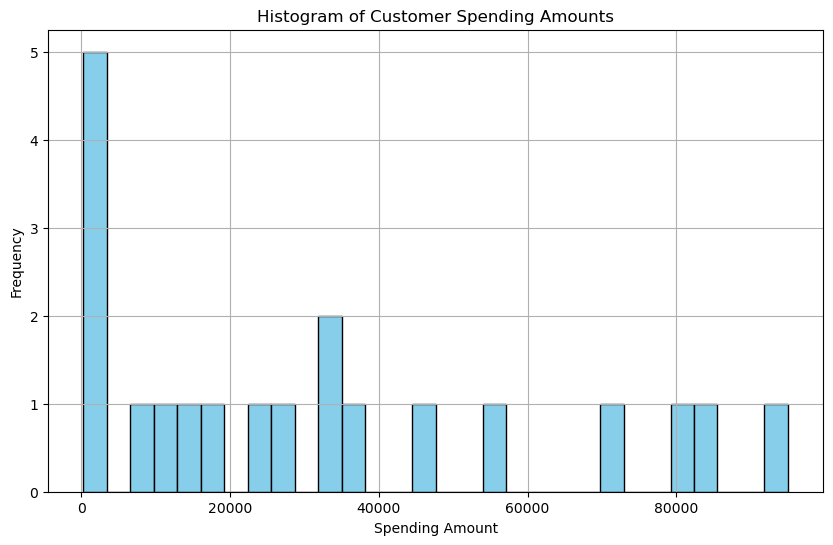

Histogram displayed.

(b) Creating log transformation of customer spending amounts...
Log-transformed column 'Log Spending' created.
   ann_spending  Log Spending
0         34112     10.437405
1         33266     10.412291
2         36610     10.508077
3         27381     10.217605
4         46100     10.738568

(c) Making histogram of log-transformed customer spending amounts...


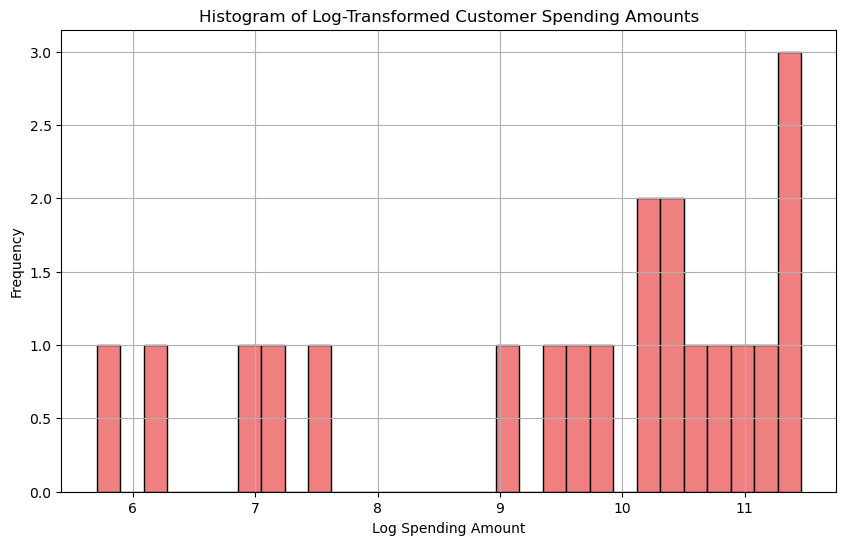

Log-transformed histogram displayed.

(d) Comparing histograms and discussing usefulness of log transformation:

Comparison of Histograms:
The original spending histogram likely shows a right-skewed distribution, meaning that most customers have lower spending amounts,
and there are a few customers with very high spending amounts (a long tail to the right).
The log-transformed histogram, on the other hand, will appear more symmetrical and closer to a normal (bell-shaped) distribution.

Usefulness of Log Transformation for Modeling Purposes:
1.  **Normalizing Skewed Data:** Many statistical models (e.g., linear regression) and machine learning algorithms assume that the input data 
    is normally distributed or at least symmetrically distributed. Log transformation can help in normalizing such skewed distributions,
    improving model performance and validity of statistical tests.
2.  **Reducing Heteroscedasticity:** In regression analysis, a common assumption is homoscedasticity (cons

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import io # Import the io module to read string data as a file

# Sample content for us_pop_data.csv (replace with actual full content if running locally)
us_pop_data_content_sample = """year,us_pop
1790,3929326
1800,5308483
1810,7239881
1820,9638453
1830,12866020
1840,17069453
1850,23191876
1860,31443321
1870,39818449
1880,50189209
1890,62979766
1900,76212168
1910,92228496
1920,106021537
1930,123202624
1940,132164569
1950,151325798
1960,179323175
1970,203211926
1980,226545805
1990,248709873
2000,281421906
2010,308745538
"""

# Sample content for customer_spending.csv (replace with actual full content if running locally)
customer_spending_content_sample = """ann_spending
34112
33266
36610
27381
46100
12000
500
80000
15000
9000
25000
18000
300
95000
1000
55000
2000
70000
1200
85000
"""

# --- US Population Growth Problem ---

# (a) Import the data and create two new columns.
# Create one column that is the number of years since 1790.
# Create another column that is the population in millions.
print("--- US Population Growth Analysis ---")
print("Loading us_pop_data.csv from sample content...")

df_us_pop = None
try:
    # Read the sample content into a DataFrame
    df_us_pop = pd.read_csv(io.StringIO(us_pop_data_content_sample))
    print("Columns in us_pop_data.csv:", df_us_pop.columns.tolist())

    # Use the correct column names: 'year' and 'us_pop'
    year_col = 'year'
    population_col = 'us_pop'

    if year_col in df_us_pop.columns and population_col in df_us_pop.columns:
        df_us_pop['Years Since 1790'] = df_us_pop[year_col] - 1790
        df_us_pop['Population in Millions'] = df_us_pop[population_col] / 1_000_000
        print("Data loaded and new columns created successfully.")
        print(df_us_pop.head())
    else:
        print(f"Skipping US Population Growth analysis due to missing required columns: '{year_col}' or '{population_col}'.")
        df_us_pop = None
except Exception as e:
    print(f"An unexpected error occurred while loading us_pop_data.csv: {e}")
    df_us_pop = None

if df_us_pop is not None and 'Years Since 1790' in df_us_pop.columns and 'Population in Millions' in df_us_pop.columns:
    # (b) Plot the US population (in millions) versus the years since 1790.
    plt.figure(figsize=(10, 6))
    plt.scatter(df_us_pop['Years Since 1790'], df_us_pop['Population in Millions'], label='Actual Data')
    plt.title('US Population (in Millions) vs. Years Since 1790')
    plt.xlabel('Years Since 1790')
    plt.ylabel('Population (in Millions)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # (c) Create a linear regression model to predict the US population (in millions) t years from 1790.
    # Find and report the R^2 value of this model.
    print("\n(c) Creating and evaluating linear regression model...")
    X_linear = df_us_pop[['Years Since 1790']]
    y = df_us_pop['Population in Millions']

    linear_model = LinearRegression()
    linear_model.fit(X_linear, y)
    y_pred_linear = linear_model.predict(X_linear)
    r2_linear = r2_score(y, y_pred_linear)
    print(f'Linear Model R^2 value: {r2_linear:.4f}')

    # (d) Create another new column in your data by squaring the number of years since 1790.
    print("\n(d) Creating 'Years Since 1790 Squared' column...")
    df_us_pop['Years Since 1790 Squared'] = df_us_pop['Years Since 1790']**2
    print("Column created.")
    print(df_us_pop.head())

    # (e) Run another linear regression, where your input feature is the square of the number of years since 1790.
    # Find and report the R^2-value of this model.
    print("\n(e) Creating and evaluating squared regression model...")
    X_squared = df_us_pop[['Years Since 1790 Squared']]

    squared_model = LinearRegression()
    squared_model.fit(X_squared, y)
    y_pred_squared = squared_model.predict(X_squared)
    r2_squared = r2_score(y, y_pred_squared)
    print(f'Squared Model R^2 value: {r2_squared:.4f}')

    # (f) Plot the models you built on top of the data. Which one fits the data better?
    # Is this apparent in your R^2-values. Explain.
    print("\n(f) Plotting models and comparing R^2 values...")
    plt.figure(figsize=(10, 6))
    plt.scatter(df_us_pop['Years Since 1790'], df_us_pop['Population in Millions'], label='Actual Data', alpha=0.7)
    plt.plot(df_us_pop['Years Since 1790'], y_pred_linear, color='red', linestyle='--', label=f'Linear Model (R^2: {r2_linear:.4f})')
    # Sort for plotting the squared model as it's a curve, not necessarily ordered by X_squared
    df_us_pop_sorted = df_us_pop.sort_values(by='Years Since 1790')
    plt.plot(df_us_pop_sorted['Years Since 1790'], squared_model.predict(df_us_pop_sorted[['Years Since 1790 Squared']]), color='green', linestyle='-', label=f'Squared Model (R^2: {r2_squared:.4f})')
    plt.title('US Population Data with Linear and Squared Models')
    plt.xlabel('Years Since 1790')
    plt.ylabel('Population (in Millions)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n--- Model Comparison ---")
    print(f"Linear Model R^2: {r2_linear:.4f}")
    print(f"Squared Model R^2: {r2_squared:.4f}")

    if r2_squared > r2_linear:
        print("\nThe squared model fits the data better than the linear model.")
        print("This is apparent in the R^2 values, as the squared model has a higher R^2 value,")
        print("indicating that it explains a larger proportion of the variance in the dependent variable.")
        print("Visually, the squared model's curve appears to follow the trend of the data points more closely.")
    else:
        print("\nThe linear model fits the data better (or equally well) than the squared model.")
        print("This is apparent in the R^2 values, as the linear model has a higher (or equal) R^2 value.")
        print("Visually, the linear model's line appears to follow the trend of the data points more closely.")

# --- Customer Spending Data Problem ---

print("\n\n--- Customer Spending Data Analysis ---")
print("Loading customer_spending.csv from sample content...")

df_spending = None
try:
    # Read the sample content into a DataFrame
    df_spending = pd.read_csv(io.StringIO(customer_spending_content_sample))
    print("Columns in customer_spending.csv:", df_spending.columns.tolist())

    # Use the correct column name: 'ann_spending'
    spending_col = 'ann_spending'

    if spending_col in df_spending.columns:
        # (a) Make a histogram of the customer spending amounts.
        print("\n(a) Making histogram of customer spending amounts...")
        plt.figure(figsize=(10, 6))
        plt.hist(df_spending[spending_col], bins=30, edgecolor='black', color='skyblue')
        plt.title('Histogram of Customer Spending Amounts')
        plt.xlabel('Spending Amount')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        print("Histogram displayed.")

        # (b) Make a new data set that is a log transformation of the customer spending amounts.
        print("\n(b) Creating log transformation of customer spending amounts...")
        # Check for non-positive values before log transformation
        if (df_spending[spending_col] <= 0).any():
            print("Warning: Spending amounts contain non-positive values. Adding a small constant before log transformation.")
            df_spending['Log Spending'] = np.log(df_spending[spending_col] + 1e-6)
        else:
            df_spending['Log Spending'] = np.log(df_spending[spending_col])
        print("Log-transformed column 'Log Spending' created.")
        print(df_spending.head())

        # (c) Make a histogram of the log transformed dataset.
        print("\n(c) Making histogram of log-transformed customer spending amounts...")
        plt.figure(figsize=(10, 6))
        plt.hist(df_spending['Log Spending'], bins=30, edgecolor='black', color='lightcoral')
        plt.title('Histogram of Log-Transformed Customer Spending Amounts')
        plt.xlabel('Log Spending Amount')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        print("Log-transformed histogram displayed.")

        # (d) Compare the two histograms. Discuss why it might be useful to apply a log transformation to this data for modeling purposes.
        print("\n(d) Comparing histograms and discussing usefulness of log transformation:")
        print("\nComparison of Histograms:")
        print("The original spending histogram likely shows a right-skewed distribution, meaning that most customers have lower spending amounts,")
        print("and there are a few customers with very high spending amounts (a long tail to the right).")
        print("The log-transformed histogram, on the other hand, will appear more symmetrical and closer to a normal (bell-shaped) distribution.")

        print("\nUsefulness of Log Transformation for Modeling Purposes:")
        print("1.  **Normalizing Skewed Data:** Many statistical models (e.g., linear regression) and machine learning algorithms assume that the input data ")
        print("    is normally distributed or at least symmetrically distributed. Log transformation can help in normalizing such skewed distributions,")
        print("    improving model performance and validity of statistical tests.")
        print("2.  **Reducing Heteroscedasticity:** In regression analysis, a common assumption is homoscedasticity (constant variance of errors).")
        print("    If the variance of the errors increases with the independent variable (heteroscedasticity), log transformation of the dependent variable")
        print("    can often stabilize the variance, leading to more reliable parameter estimates and standard errors.")
        print("3.  **Handling Outliers:** Log transformation can reduce the impact of extreme values (outliers) by compressing the range of the data.")
        print("    Large differences in the original scale become smaller differences in the log scale, making the model less sensitive to outliers.")
        print("4.  **Interpreting Multiplicative Relationships:** When relationships between variables are multiplicative rather than additive (e.g., a constant percentage increase),")
        print("    a log transformation can linearize them. For example, a log-log model is appropriate if a 1% increase in one variable leads to a constant percentage increase in another,")
        print("    making it easier to model with linear regression.")
    else:
        print(f"Skipping Customer Spending Data analysis due to missing required column: '{spending_col}'.")
        df_spending = None
except Exception as e:
    print(f"An unexpected error occurred while loading customer_spending.csv: {e}")
    df_spending = None